In [1]:
# 네이버 영화 평점 변화 확인
# 2017년 8월 6일의 영화 평점 -> 크롬으로 접속
# https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&date=20170806
# 크롬 개발자도구(F12 단축키)로 영화 제목 태그 확인

from bs4 import BeautifulSoup
import pandas as pd



In [2]:
from urllib.request import urlopen

url_base = 'http://movie.naver.com/'
url_syb = 'movie/sdb/rank/rmovie.nhn?sel=cur&date=20170804'

url = url_base + url_syb
page = urlopen(url)

soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html lang="ko">
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20170804" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>


In [3]:
# 영화제목 검색
soup.find_all('div','tit5')

[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=62586" title="다크 나이트">다크 나이트</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10448" title="오즈의 마법사">오즈의 마법사</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=154437" title="내 사랑">내 사랑</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=160135" title="서서평, 천천히 평온하게">서서평, 천천히 평온하게</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=10217" title="로보캅">로보캅</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=76309" title="플립">플립</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=159054" title="명탐정 코난:진홍의 연가">명탐정 코난:진홍의 연가</a>
 </div>,
 <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?

In [4]:
soup.find_all('div','tit5')[0].a.get_text()
soup.find_all('div','tit5')[0].a.string

'다크 나이트'

In [5]:
#평점 검색
soup.find_all('td','point')[0].get_text()

'9.32'

In [6]:
#날짜를 2020년 1월 1일부터 100일간
date = pd.date_range('2020-01-01', periods=10, freq='D')
date

DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10'],
              dtype='datetime64[ns]', freq='D')

In [7]:
import urllib
from tqdm import tqdm_notebook

movie_date = []
movie_name = []
movie_point = []

for today in tqdm_notebook(date):
    html = url_base + 'movie/sdb/rank/rmovie.nhn?sel=cur&date={date}'
    # date를 변수로 설정
    
    # 변수 처리된 date를 불러들임
    response = urlopen(html.format(date=urllib.parse.quote(today.strftime('%Y%m%d'))))
    
    soup = BeautifulSoup(response, 'html.parser')
    
    # 영화 갯수
    end = len(soup.find_all('td','point'))
    
    movie_date.extend([today for n in range(0, end)])
    movie_name.extend([soup.find_all('div','tit5')[n].a.string for n in range(0,end)])
    movie_point.extend([soup.find_all('td','point')[n].string for n in range(0,end)])
                                                                          
                                                                        

c:\users\kcs\anaconda3\envs\study36\lib\site-packages\ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/10 [00:00<?, ?it/s]

In [8]:
# dataframe
movie = pd.DataFrame({'date':movie_date, 'name':movie_name, 'point':movie_point})
movie.head()

,date,name,point
0,2020-01-01,포드 V 페라리,9.57
1,2020-01-01,주전장,9.53
2,2020-01-01,눈의 여왕4,9.32
3,2020-01-01,러브 앳,9.27
4,2020-01-01,교회오빠,9.27


In [9]:
# point를 float으로 변환
movie.point = pd.to_numeric(movie.point)
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    392 non-null    datetime64[ns]
 1   name    392 non-null    object        
 2   point   392 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 9.3+ KB


In [10]:
# 최대값으로 best movie 선정
import numpy as np

movie_unique = pd.pivot_table(movie, index=['name'], aggfunc=np.max)
movie_best = movie_unique.sort_values(by='point', ascending=False)
movie_best.head()

,date,point
name,,
포드 V 페라리,2020-01-10,9.57
주전장,2020-01-10,9.53
두 교황,2020-01-10,9.36
눈의 여왕4,2020-01-10,9.32
러브 앳,2020-01-10,9.27


In [11]:
temp = pd.pivot_table(movie, index=['name'])
temp.sort_values(by='point', ascending=False, inplace=True)
temp.head()

,point
name,
포드 V 페라리,9.555000
주전장,9.530000
두 교황,9.344444
러브 앳,9.270000
교회오빠,9.270000


In [12]:
movie_best.index

Index(['포드 V 페라리', '주전장', '두 교황', '눈의 여왕4', '러브 앳', '교회오빠', '나, 다니엘 블레이크',
       '피아니스트의 전설', '킹 오브 프리즘', '나이브스 아웃', '킹 오브 프리즘 프라이드 더 히어로',
       '하이큐!! 재능과 센스', '러브레터', '결혼 이야기', '하이큐!! 승자와 패자', '윤희에게', '러브 액츄얼리',
       '미드웨이', '인비저블 게스트', '하이큐!! 끝과 시작', '아이리시맨', '벌새', '일일시호일',
       '천문: 하늘에 묻는다', '겨울왕국 2', '터미네이터: 다크 페이트', '닥터 두리틀',
       '신비아파트 극장판 하늘도깨비 대 요르문간드', '더 킹: 헨리 5세', '기생충', '보리밭을 흔드는 바람', '메기',
       '21 브릿지: 테러 셧다운', '시동', '날씨의 아이', '스타워즈: 라이즈 오브 스카이워커', '더 포리너',
       '감쪽같은 그녀', '멀홀랜드 드라이브', '라스트 크리스마스', '82년생 김지영', '삽질', '대통령의 7시간',
       '쥬만지: 넥스트 레벨', '백두산', '아내를 죽였다', '캣츠', '킹 오브 프리즘 -샤이니 세븐 스타즈-'],
      dtype='object', name='name')

In [13]:
# query 명령어로 name에 해당하는 정보를 추릴 수 있음!
tmp = movie.query('name==["주전장"]')
tmp

,date,name,point
1,2020-01-01,주전장,9.53
39,2020-01-02,주전장,9.53
76,2020-01-03,주전장,9.53
113,2020-01-04,주전장,9.53
150,2020-01-05,주전장,9.53
187,2020-01-06,주전장,9.53
224,2020-01-07,주전장,9.53
264,2020-01-08,주전장,9.53
306,2020-01-09,주전장,9.53
348,2020-01-10,주전장,9.53


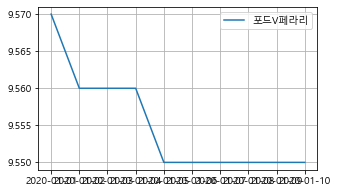

In [14]:
# 포드v페라리 영화의 평점 변화
import matplotlib.pyplot as plt
%matplotlib inline

#한글 출력 
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
f_path = 'c:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname=f_path).get_name()
rc('font',family=font_name)

tmp = movie.query('name==["포드 V 페라리"]')

plt.figure(figsize=(5,3))
plt.plot(tmp['date'], tmp['point'], label='포드V페라리')
plt.legend(loc='best') # location best
plt.grid()
plt.show()


In [15]:
# 영화별 날짜변화에 따른 평점 변화
movie_pivot = pd.pivot_table(movie, index=['date'], columns=['name'], values=['point'])
movie_pivot.head()

point                                             \
name       21 브릿지: 테러 셧다운 82년생 김지영 감쪽같은 그녀 겨울왕국 2 결혼 이야기  교회오빠   기생충   
date                                                                   
2020-01-01            NaN     6.69    7.52   8.71   9.10  9.27  8.49   
2020-01-02            NaN     6.69     NaN   8.71   9.10  9.27  8.49   
2020-01-03            NaN     6.69     NaN   8.71   9.09  9.27  8.49   
2020-01-04            NaN     6.69     NaN   8.71   9.09  9.27  8.49   
2020-01-05            NaN     6.69     NaN   8.71   9.07  9.27  8.49   

                                       ...                 \
name       나, 다니엘 블레이크 나이브스 아웃 날씨의 아이  ...    캣츠 킹 오브 프리즘   
date                                   ...                  
2020-01-01        9.27    9.14   7.89  ...  4.67      NaN   
2020-01-02        9.27    9.14   7.89  ...  4.67      NaN   
2020-01-03        9.27    9.14   7.89  ...  4.66      NaN   
2020-01-04        9.27    9.14   7.89  ...  4.66      NaN   
2020-01-05        9.27    9.15   7.89  ...  4.66      NaN   

                                                                             \
name       킹 오브 프리즘 -샤이니 세븐 스타즈- 킹 오브 프리즘 프라이드 더 히어로 터미네이터: 다크 페이트 포드 V 페라리   
date                                                                          
2020-01-01                   NaN                 NaN          8.62     9.57   
2020-01-02                   NaN                 NaN           NaN     9.56   
2020-01-03                   NaN                 NaN           NaN     9.56   
2020-01-04                   NaN                 NaN           NaN     9.56   
2020-01-05                   NaN                 NaN           NaN     9.55   

                                                            
name       피아니스트의 전설 하이큐!! 끝과 시작 하이큐!! 승자와 패자 하이큐!! 재능과 센스  
date                                                        
2020-01-01      9.24         NaN          NaN          NaN  
2020-01-02      9.25         NaN          NaN          NaN  
2020-01-03      9.25         NaN          NaN          NaN  
2020-01-04      9.25         NaN          NaN          NaN  
2020-01-05      9.25         NaN          NaN          NaN  

[5 rows x 48 columns]

In [16]:
movie_pivot.to_csv('./movie_pivot.csv',encoding='utf-8-sig')

In [17]:
# 컬럼 제목 삭제
movie_pivot.columns = movie_pivot.columns.droplevel()
movie_pivot.head()

name,21 브릿지: 테러 셧다운,82년생 김지영,감쪽같은 그녀,겨울왕국 2,결혼 이야기,교회오빠,기생충,"나, 다니엘 블레이크",나이브스 아웃,날씨의 아이,...,캣츠,킹 오브 프리즘,킹 오브 프리즘 -샤이니 세븐 스타즈-,킹 오브 프리즘 프라이드 더 히어로,터미네이터: 다크 페이트,포드 V 페라리,피아니스트의 전설,하이큐!! 끝과 시작,하이큐!! 승자와 패자,하이큐!! 재능과 센스
date,,,,,,,,,,,,,,,,,,,,,
2020-01-01,NaN,6.69,7.52,8.71,9.10,9.27,8.49,9.27,9.14,7.89,...,4.67,NaN,NaN,NaN,8.62,9.57,9.24,NaN,NaN,NaN
2020-01-02,NaN,6.69,NaN,8.71,9.10,9.27,8.49,9.27,9.14,7.89,...,4.67,NaN,NaN,NaN,NaN,9.56,9.25,NaN,NaN,NaN
2020-01-03,NaN,6.69,NaN,8.71,9.09,9.27,8.49,9.27,9.14,7.89,...,4.66,NaN,NaN,NaN,NaN,9.56,9.25,NaN,NaN,NaN
2020-01-04,NaN,6.69,NaN,8.71,9.09,9.27,8.49,9.27,9.14,7.89,...,4.66,NaN,NaN,NaN,NaN,9.56,9.25,NaN,NaN,NaN
2020-01-05,NaN,6.69,NaN,8.71,9.07,9.27,8.49,9.27,9.15,7.89,...,4.66,NaN,NaN,NaN,NaN,9.55,9.25,NaN,NaN,NaN


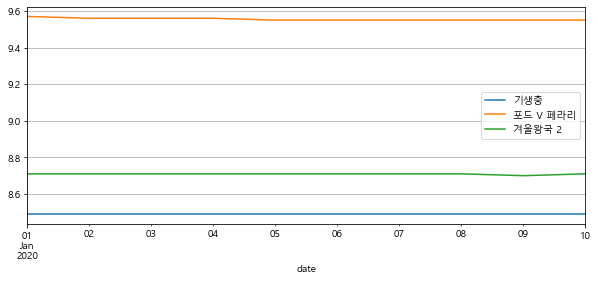

In [18]:
# 관심있는 영화 몇개에 대한 날짜별 평점 변화 그래프
movie_pivot.plot(y=['기생충','포드 V 페라리','겨울왕국 2'],figsize=(10,4))
plt.legend(loc='best')
plt.grid()
plt.show()